In [24]:
pip install tensorflow==2.10.0


  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached grpcio-1.65.1-cp38-cp38-win_amd64.whl (4.1 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Markdown-3.6-py3-none-any.whl (105 kB)
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf

In [3]:
pip install numpy==1.21.0

In [1]:
import zipfile
import os

# Define the path to the uploaded zip file and extraction directory
zip_file_path = 'C:/Users/91877/Downloads/MoodforMusic.zip'  # Update this path
extraction_dir = 'C:/path/to/extraction/directory/'  # Update this path

# Create the extraction directory if it does not exist
os.makedirs(extraction_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List the contents of the extracted directory
extracted_files = os.listdir(extraction_dir)
print(extracted_files)


['data_moods.csv', 'test', 'train']


Found 28711 images belonging to 2 classes.
Found 7176 images belonging to 2 classes.
Found 35887 images belonging to 2 classes.
Class Distribution in Training Set:
test: 5743
train: 22968
Epoch 1/10
898/898 [==============================] - 405s 451ms/step - loss: 0.5228 - accuracy: 0.7982 - val_loss: 0.5061 - val_accuracy: 0.8000
Epoch 2/10
898/898 [==============================] - 397s 442ms/step - loss: 0.5059 - accuracy: 0.8000 - val_loss: 0.5049 - val_accuracy: 0.8000
Epoch 3/10
898/898 [==============================] - 528s 588ms/step - loss: 0.5028 - accuracy: 0.8000 - val_loss: 0.5021 - val_accuracy: 0.8000
Epoch 4/10
898/898 [==============================] - 528s 588ms/step - loss: 0.4988 - accuracy: 0.8000 - val_loss: 0.5015 - val_accuracy: 0.8000
Epoch 5/10
898/898 [==============================] - 411s 458ms/step - loss: 0.4931 - accuracy: 0.7998 - val_loss: 0.5046 - val_accuracy: 0.7999
Epoch 6/10
898/898 [==============================] - 418s 465ms/step - loss: 0.48

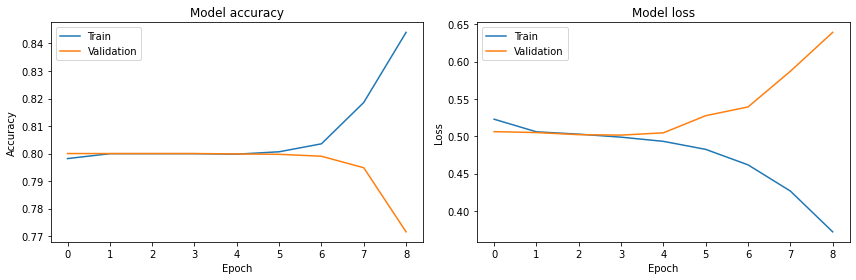

1122/1122 [==============================] - 106s 95ms/step - loss: 0.4942 - accuracy: 0.8000
Test accuracy: 0.80
1122/1122 [==============================] - 111s 99ms/step


C:\Users\91877\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91877\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91877\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        test       0.00      0.00      0.00      7178
       train       0.80      1.00      0.89     28709

    accuracy                           0.80     35887
   macro avg       0.40      0.50      0.44     35887
weighted avg       0.64      0.80      0.71     35887



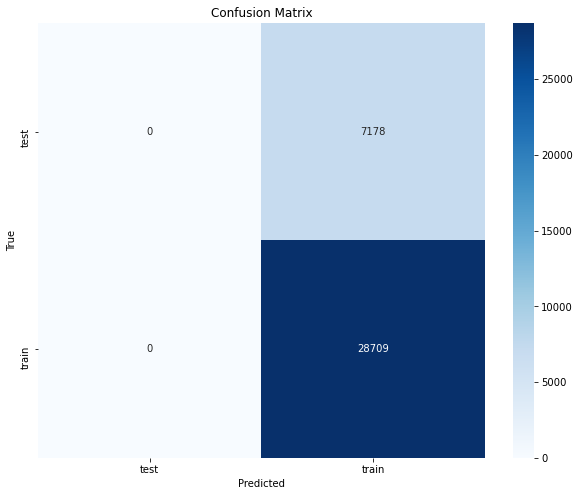

In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Define directories
train_dir = 'C:/path/to/extraction/directory/'  # Update this path
test_dir = 'C:/path/to/extraction/directory/'    # Update this path

# Define image dimensions and batch size
img_width, img_height = 128, 128
batch_size = 32

# Create ImageDataGenerator instances for training and testing
train_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create generators to load images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='sparse'
)

# Analyze class distribution in training set
class_labels = list(train_generator.class_indices.keys())
train_class_counts = train_generator.classes
unique, counts = np.unique(train_class_counts, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution in Training Set:")
for class_idx, count in class_distribution.items():
    print(f"{class_labels[class_idx]}: {count}")
    
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model using the generators
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

# Make predictions and generate a classification report
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Save the model
model.save('mood_detection_model.h5')



In [3]:
import random
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model  # Assuming you're loading a pre-trained model

# Music Recommendation Engine
def recommend_music(mood):
    mood_to_music = {
        'happy': ['Happy by Pharrell Williams', 'Uptown Funk by Mark Ronson ft. Bruno Mars'],
        'sad': ['Someone Like You by Adele', 'Fix You by Coldplay'],
        'angry': ['Breaking the Habit by Linkin Park', 'The Way I Am by Eminem'],
        'neutral': ['Shake It Off by Taylor Swift', 'Roar by Katy Perry']
    }
    return random.choice(mood_to_music.get(mood, ['No recommendations available']))

# Function to capture mood from image and recommend music
def capture_mood_and_recommend_music(image_path, model, class_labels):
    img_width, img_height = 128, 128  # Example dimensions, adjust as necessary

    img = image.load_img(image_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    mood = class_labels[predicted_class[0]]

    print(f'Detected mood: {mood}')
    recommended_song = recommend_music(mood)
    print(f'Recommended song: {recommended_song}')

# Example usage
image_path = input("Enter the image path: ")
# Load your pre-trained model here
model = load_model('mood_detection_model.h5')
# Define the class labels as per your model's training
class_labels = ['happy', 'sad', 'angry', 'neutral']  # Example class labels

capture_mood_and_recommend_music(image_path, model, class_labels)


Enter the image path: Training_1206.jpg
1/1 [==============================] - 0s 135ms/step
Detected mood: sad
Recommended song: Fix You by Coldplay
